In [ ]:
from google.colab import drive
drive.mount('/content/drive')

QUESTION 1:


Thông tin về tập train:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1462 entries, 0 to 1461
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   date          1462 non-null   object 
 1   meantemp      1462 non-null   float64
 2   humidity      1462 non-null   float64
 3   wind_speed    1462 non-null   float64
 4   meanpressure  1462 non-null   float64
dtypes: float64(4), object(1)
memory usage: 57.2+ KB
None

Mô tả thống kê tập train:
          meantemp     humidity   wind_speed  meanpressure
count  1462.000000  1462.000000  1462.000000   1462.000000
mean     25.495521    60.771702     6.802209   1011.104548
std       7.348103    16.769652     4.561602    180.231668
min       6.000000    13.428571     0.000000     -3.041667
25%      18.857143    50.375000     3.475000   1001.580357
50%      27.714286    62.625000     6.221667   1008.563492
75%      31.305804    72.218750     9.238235   1014.944901
max      38.

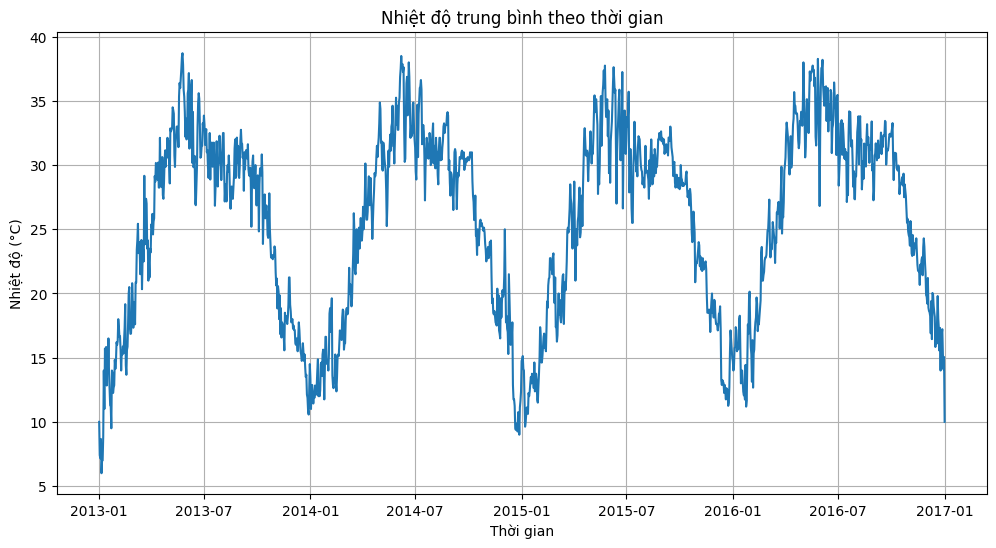

Shape của X_train: (1432, 30, 4)
Shape của y_train: (1432,)


In [29]:
# Import các thư viện cần thiết
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# 1. Đọc dữ liệu
train_data = pd.read_csv('/content/drive/MyDrive/Internet of Things – Chuyên ngành hẹp - Khoa học Máy Tính/IOT3/ModuleAI/DailyDelhiClimateTrain.csv')
test_data = pd.read_csv('/content/drive/MyDrive/Internet of Things – Chuyên ngành hẹp - Khoa học Máy Tính/IOT3/ModuleAI/DailyDelhiClimateTest.csv')

# 2. Hiển thị thông tin dữ liệu
print("Thông tin về tập train:")
print(train_data.info())
print("\nMô tả thống kê tập train:")
print(train_data.describe())

# 3. Đặt date làm index
train_data['date'] = pd.to_datetime(train_data['date'])
train_data.set_index('date', inplace=True)

# 4. Vẽ biểu đồ nhiệt độ trung bình
plt.figure(figsize=(12, 6))
plt.plot(train_data.index, train_data['meantemp'])
plt.title('Nhiệt độ trung bình theo thời gian')
plt.xlabel('Thời gian')
plt.ylabel('Nhiệt độ (°C)')
plt.grid(True)
plt.show()

# 5. Chuẩn hóa dữ liệu using Min-Max
scaler = MinMaxScaler()
train_scaled = scaler.fit_transform(train_data)
train_scaled = pd.DataFrame(train_scaled, columns=train_data.columns, index=train_data.index)

# 6. Xây dựng tập training dataset
def create_sequences(data, time_steps):
    X, y = [], []
    for i in range(len(data) - time_steps):
        X.append(data[i:(i + time_steps)])
        y.append(data[i + time_steps, 0])  # 0 là chỉ số của cột meantemp
    return np.array(X), np.array(y)

time_steps = 30
X_train, y_train = create_sequences(train_scaled.values, time_steps)
print("Shape của X_train:", X_train.shape)
print("Shape của y_train:", y_train.shape)

QUESTION 2:


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_5 (LSTM)                        │ (None, 64)                  │          17,664 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 17,729 (69.25 KB)

 Trainable params: 17,729 (69.25 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 3s 111ms/step - loss: 0.0831 - mae: 0.2355 - val_loss: 0.0085 - val_mae: 0.0702
Epoch 2/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 81ms/step - loss: 0.0167 - mae: 0.1042 - val_loss: 0.0042 - val_mae: 0.0528
Epoch 3/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 80ms/step - loss: 0.0115 - mae: 0.0852 - val_loss: 0.0035 - val_mae: 0.0480
Epoch 4/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 0.0099 - mae: 0.0796 - val_loss: 0.0045 - val_mae: 0.0534
Epoch 5/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 0.0100 - mae: 0.0797 - val_loss: 0.0040 - val_mae: 0.0514
Epoch 6/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 0.0097 - mae: 0.0775 - val_loss: 0.0048 - val_mae: 0.0544
Epoch 7/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - loss: 0.0082 - mae: 0.0725 - val_loss: 0.0037 - val_mae: 0.0479
Epoch 8/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - loss: 0.0081 - mae: 0.0711 - val_loss: 0.0034 - val_mae: 0.0465
Epoch 9/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - loss: 0.00

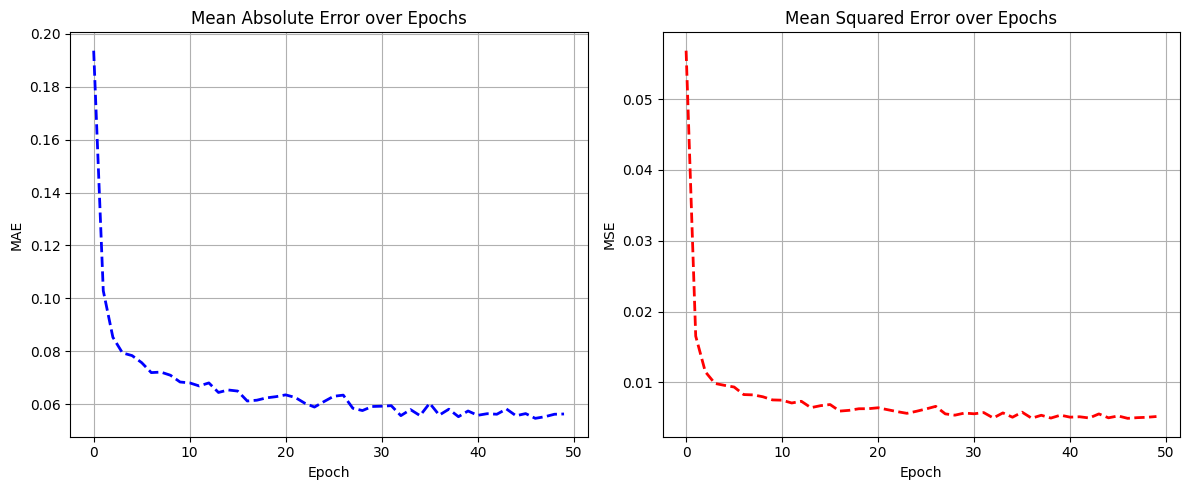

In [21]:
# Xây dựng mô hình LSTM
model = Sequential([
    LSTM(64, input_shape=(time_steps, train_scaled.shape[1])),
    Dropout(0.2),
    Dense(1, activation='linear')
])

# Biên dịch mô hình
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Hiển thị kiến trúc mô hình
model.summary()

# Huấn luyện mô hình
history = model.fit(
    X_train, y_train,
    epochs=50,
    batch_size=128,
    validation_split=0.1,
    verbose=1
)

# Lưu mô hình
model.save('/content/drive/MyDrive/Internet of Things – Chuyên ngành hẹp - Khoa học Máy Tính/IOT3/ModuleAI/21004173.h5')

# Vẽ đồ thị MAE và MSE
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['mae'], '--', linewidth=2.0,color='blue')
plt.title('Mean Absolute Error over Epochs')
plt.xlabel('Epoch')
plt.ylabel('MAE')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], '--', linewidth=2.0, color='red')
plt.title('Mean Squared Error over Epochs')
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.grid(True)

plt.tight_layout()
plt.show()

QUESTION 3:


In [32]:
from tensorflow.keras.models import load_model
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import MeanAbsoluteError

# Đường dẫn đến model
model_path = '/content/drive/MyDrive/Internet of Things – Chuyên ngành hẹp - Khoa học Máy Tính/IOT3/ModuleAI/21004173.h5'

# Load model với custom_objects
custom_objects = {
    'mse': MeanSquaredError(),
    'mae': MeanAbsoluteError()
}

# Load model
model = load_model(model_path, custom_objects=custom_objects)

# Compile lại model
model.compile(optimizer='adam',
              loss='mse',
              metrics=['mae'])

# Sử dụng model để predict
y_pred_scaled = model.predict(X_test)

# In thông tin model
print("Model Summary:")
model.summary()

3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 118ms/step
Model Summary:


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_5 (LSTM)                        │ (None, 64)                  │          17,664 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 17,729 (69.25 KB)

 Trainable params: 17,729 (69.25 KB)

 Non-trainable params: 0 (0.00 B)

Shape của X_test: (84, 30, 4)
Shape của y_test: (84,)
<Sequential name=sequential_5, built=True>
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Root Mean Square Error: 2.08


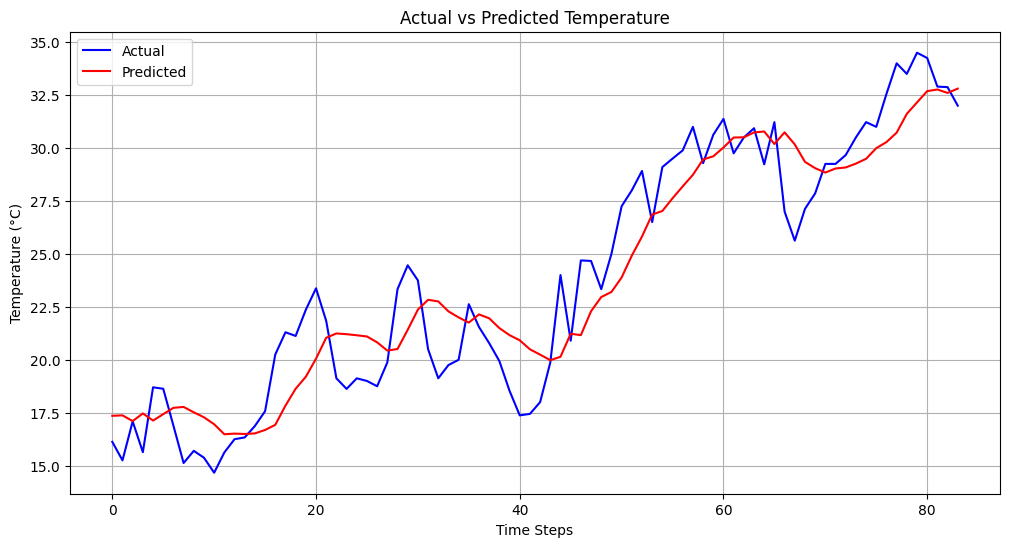

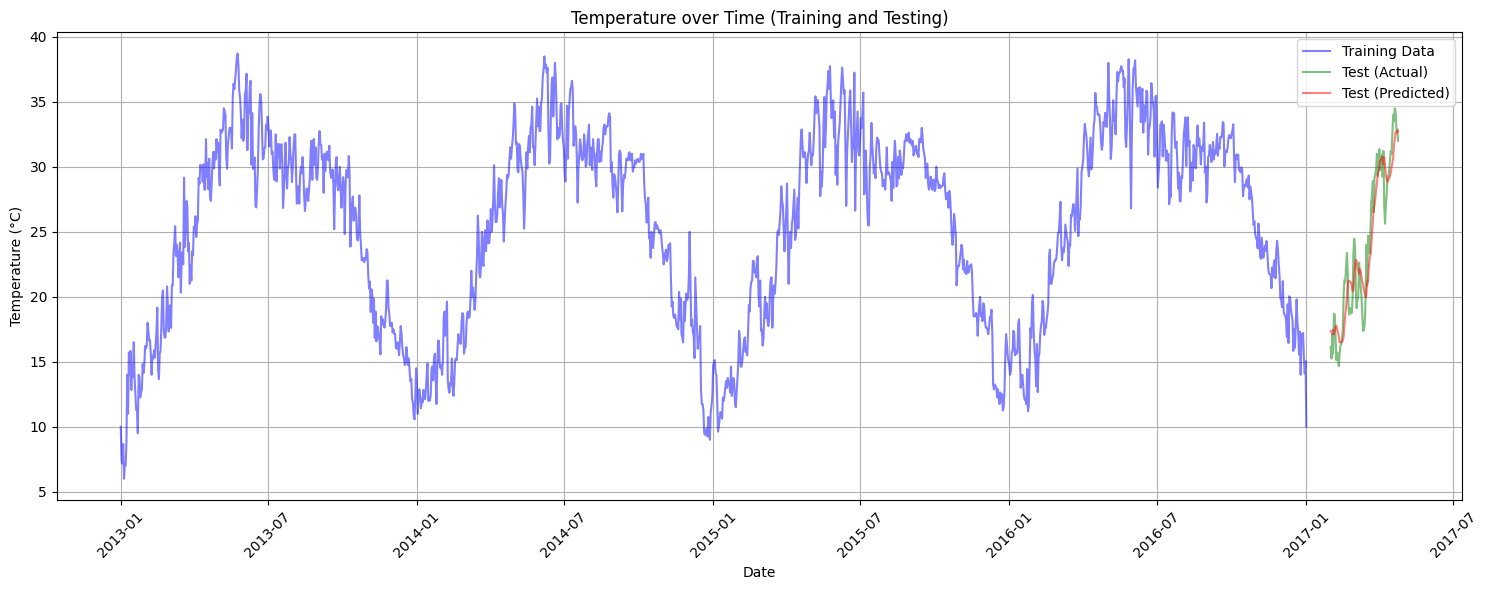

In [30]:
# 3.1 Chuẩn hóa dữ liệu test
test_data['date'] = pd.to_datetime(test_data['date'])
test_data.set_index('date', inplace=True)
test_scaled = scaler.transform(test_data)  # Sử dụng scaler đã fit từ tập train
test_scaled = pd.DataFrame(test_scaled, columns=test_data.columns, index=test_data.index)

# 3.2 Xây dựng tập test dataset
X_test, y_test = create_sequences(test_scaled.values, time_steps)
print("Shape của X_test:", X_test.shape)
print("Shape của y_test:", y_test.shape)

# 3.3 Dự đoán
print(model)
y_pred_scaled = model.predict(X_test)

# Chuyển đổi giá trị dự đoán về thang đo gốc
y_test_orig = scaler.inverse_transform(np.zeros((len(y_test), train_data.shape[1])))[:, 0]
y_test_orig[:] = scaler.inverse_transform(np.zeros((len(y_test), train_data.shape[1])) + np.column_stack((y_test, np.zeros((len(y_test), train_data.shape[1]-1)))))[:, 0]
y_pred_orig = scaler.inverse_transform(np.zeros((len(y_pred_scaled), train_data.shape[1])))[:, 0]
y_pred_orig[:] = scaler.inverse_transform(np.zeros((len(y_pred_scaled), train_data.shape[1])) + np.column_stack((y_pred_scaled, np.zeros((len(y_pred_scaled), train_data.shape[1]-1)))))[:, 0]

# 3.4 Tính RMSE
rmse = np.sqrt(np.mean((y_test_orig - y_pred_orig) ** 2))
print(f'Root Mean Square Error: {rmse:.2f}')

# 3.5 Vẽ biểu đồ đánh giá kết quả
plt.figure(figsize=(12, 6))
plt.plot(y_test_orig, label='Actual', color='blue')
plt.plot(y_pred_orig, label='Predicted', color='red')
plt.title('Actual vs Predicted Temperature')
plt.xlabel('Time Steps')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.grid(True)
plt.show()

# 3.6 Vẽ biểu đồ mối quan hệ giữa Date và Temperature
plt.figure(figsize=(15, 6))

# Vẽ dữ liệu train
plt.plot(train_data.index, train_data['meantemp'],
         label='Training Data', color='blue', alpha=0.5)

# Vẽ dữ liệu test thực tế và dự đoán
test_dates = test_data.index[time_steps:]
plt.plot(test_dates, y_test_orig,
         label='Test (Actual)', color='green', alpha=0.5)
plt.plot(test_dates, y_pred_orig,
         label='Test (Predicted)', color='red', alpha=0.5)

plt.title('Temperature over Time (Training and Testing)')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()